#### This is the second part of the final project of module 1
#### We are starting over from a dataframe called df4 that was exported in the jupyter notebook Analysis_part1.ipynb


In [75]:
import pandas as pd
df4= pd.read_csv('./Data/df4.csv')
df4

Unnamed: 0                     movie_and_date  id release_date  \
0              0                  Higher Power_2018  67   2018-05-11   
1              1  The Ghastly Love of Johnny X_2012  74   2012-10-26   
2              2         10 Days in a Madhouse_2015  48   2015-11-11   
3              3                       Area 51_2015  81   2015-05-15   
4              4              Freaks of Nature_2015  83   2015-10-30   
...          ...                                ...  ..          ...   
1363        1363         Paranormal Activity 3_2011  51   2011-10-21   
1364        1364             Chernobyl Diaries_2012  18   2012-05-25   
1365        1365                     Moonlight_2016  64   2016-10-21   
1366        1366                       Get Out_2017  49   2017-02-24   
1367        1367         Paranormal Activity 2_2010  65   2010-10-20   

                             movie  production_budget  domestic_gross  \
0                     Higher Power             500000             528   
1     The Ghastly Love of Johnny X            2000000            2436   
2            10 Days in a Madhouse           12000000           14616   
3                          Area 51            5000000            7556   
4                 Freaks of Nature           33000000           70958   
...                            ...                ...             ...   
1363         Paranormal Activity 3            5000000       104028807   
1364             Chernobyl Diaries            1000000        18119640   
1365                     Moonlight            1500000        27854931   
1366                       Get Out            5000000       176040665   
1367         Paranormal Activity 2            3000000        84752907   

      worldwide_gross  release_year  index     tconst  \
0                 528          2018  49123  tt2924392   
1                2436          2012  16165  tt1754633   
2               14616          2015  59400  tt3453052   
3                7556          2015   8624  tt1519461   
4               70958          2015  18716  tt1817771   
...               ...           ...    ...        ...   
1363        207039844          2011  17175  tt1778304   
1364         42411721          2012  24683  tt1991245   
1365         65245512          2016  85930  tt4975722   
1366        255367951          2017  87039  tt5052448   
1367        177512032          2010   8964  tt1536044   

                     primary_title                original_title  start_year  \
0                     Higher Power                  Higher Power        2018   
1     The Ghastly Love of Johnny X  The Ghastly Love of Johnny X        2012   
2            10 Days in a Madhouse         10 Days in a Madhouse        2015   
3                          Area 51                       Area 51        2015   
4                 Freaks of Nature              Freaks of Nature        2015   
...                            ...                           ...         ...   
1363         Paranormal Activity 3         Paranormal Activity 3        2011   
1364             Chernobyl Diaries             Chernobyl Diaries        2012   
1365                     Moonlight                     Moonlight        2016   
1366                       Get Out                       Get Out        2017   
1367         Paranormal Activity 2         Paranormal Activity 2        2010   

      runtime_minutes                   genres     profit  profit_ratio  \
0                93.0   Action,Sci-Fi,Thriller    -499472      0.001056   
1               106.0   Comedy,Fantasy,Musical   -1997564      0.001218   
2               111.0                    Drama  -11985384      0.001218   
3                91.0   Horror,Sci-Fi,Thriller   -4992444      0.001511   
4                92.0     Comedy,Horror,Sci-Fi  -32929042      0.002150   
...               ...                      ...        ...           ...   
1363             83.0  Horror,Mystery,Thriller  202039844     41.407969   
1364             8

### Join movie review 
### GOAL : analyze correlation of movie success with keywords in reviews


In [76]:
#importing file rt.reviews.tsv
df_rt_rev = pd.read_csv('Data/rt.reviews.tsv',sep='\t',encoding = 'latin-1')
# had to change encoding from default utf-8 to latin-1
print(df_rt_rev.shape)
df_rt_rev.head()


(54432, 8)


id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017

In [77]:
# visualize one example of review
df_rt_rev.iloc[0,1]

"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. "

In [78]:
#importing file rt.movie_info.tsv
df_rt_movie = pd.read_csv('Data/rt.movie_info.tsv',sep='\t')
print(df_rt_movie.shape)
df_rt_movie.head()


(1560, 12)


id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
4                     Giles Cooper           NaN           NaN      NaN   

  box_office      runtime             studio  
0        NaN  104 minutes                NaN  
1    600,000  108 minutes  Entertainment One  
2        NaN  116 minutes                NaN  
3        NaN  128 minutes                NaN  
4        NaN  200 minutes                NaN

In [79]:
# visualize an example of synopsis 
df_rt_movie.iloc[0,1]

'This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy "Popeye" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City\'s dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier\'s right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye\'s suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars\' worth of heroin into the city in a car shipped 

In [80]:
df_rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [81]:
df_rt_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Data Cleaning

#### Keep only movies where box-office is not Nan and >0. This is because it will be our indicator of success

In [82]:
df_rt_movie['box_office'].isnull().any()


True

In [83]:
df_rt_movie=df_rt_movie.loc[ df_rt_movie['box_office'].isnull() == False]

In [84]:
df_rt_movie

id                                           synopsis rating  \
1        3  New York City, not-too-distant-future: Eric Pa...      R   
6       10  Some cast and crew from NBC's highly acclaimed...  PG-13   
7       13  Stewart Kane, an Irishman living in the Austra...      R   
8       14  "Love Ranch" is a bittersweet love story that ...      R   
15      22  Two-time Academy Award Winner Kevin Spacey giv...      R   
...    ...                                                ...    ...   
1541  1980  A band of renegades on the run in outer space ...  PG-13   
1542  1981  Money, Fame and the Knowledge of English. In I...     NR   
1545  1985  A woman who joins the undead against her will ...      R   
1546  1986  Aki Kaurismaki's The Man Without a Past opens ...     PG   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   

                                                 genre             director  \
1                    Drama|Science Fiction and Fantasy     David Cronenberg   
6                                               Comedy          Jake Kasdan   
7                                                Drama         Ray Lawrence   
8                                                Drama      Taylor Hackford   
15                   Comedy|Drama|Mystery and Suspense  George Hickenlooper   
...                                                ...                  ...   
1541  Action and Adventure|Science Fiction and Fantasy          Joss Whedon   
1542                                      Comedy|Drama         Gauri Shinde   
1545                       Horror|Mystery and Suspense  Sebastian Gutierrez   
1546          Art House and International|Comedy|Drama                  NaN   
1555  Action and Adventure|Horror|Mystery and Suspense                  NaN   

                                writer  theater_date      dvd_date currency  \
1         David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
6                           Mike White  Jan 11, 2002  Jun 18, 2002        $   
7     Raymond Carver|Beatrix Christian  Apr 27, 2006   Oct 2, 2007        $   
8                        Mark Jacobson  Jun 30, 2010   Nov 9, 2010        $   
15                       Norman Snider  Dec 17, 2010   Apr 5, 2011        $   
...                                ...           ...           ...      ...   
1541                       Joss Whedon  Sep 30, 2005  Dec 20, 2005        $   
1542                      Gauri Shinde   Oct 5, 2012  Nov 20, 2012        $   
1545               Sebastian Gutierrez   Jun 1, 2007   Oct 9, 2007        $   
1546                               NaN  Aug 30, 2002   Oct 7, 2003        $   
1555                               NaN  Aug 18, 2006   Jan 2, 2007        $   

      box_office      runtime                  studio  
1        600,000  108 minutes       Entertainment One  
6     41,032,915   82 minutes      Paramount Pictures  
7        224,114  123 minutes  Sony Pictures Classics  
8        134,904  117 minutes                     NaN  
15     1,039,869  108 minutes            ATO Pictures  
...          ...          ...                     ...  
1541  25,335,935  119 minutes      Universal Pictures  
1542   1,416,189  129 minutes      Eros Entertainment  
1545      59,371   98 minutes        IDP Distribution  
1546     794,306   97 minutes                     NaN  
1555  33,886,034  106 minutes         New Line Cinema  

[340 rows x 12 columns]

#### Note: we lost a lot of data by removing movies without box office info. Future work should include to get box-office info from other datasets to keep more data.

In [85]:
# making sure only currency is $
df_rt_movie['currency'].unique()

array(['$'], dtype=object)

In [86]:
df_rt_movie.reset_index(inplace=True)

In [87]:
# remove commas from dollar amounts to enable to change the data type to a number
df_rt_movie['box_office']= [ df_rt_movie['box_office'][x].replace(',','')for x in df_rt_movie.index ]

In [88]:
# change the data type of box office to an integer
df_rt_movie=df_rt_movie.astype({'box_office':'int'})

In [89]:
df_rt_movie.sort_values(by='box_office',inplace = True)
df_rt_movie.reset_index(inplace=True)
df_rt_movie

level_0  index    id                                           synopsis  \
0        205    970  1260  With the recent assault on Berlusconi in Milan...   
1         76    359   469  Jacqueline Kennedy Onassis sued him, Marlon Br...   
2        145    697   895  After a sexual assault by a random stranger, S...   
3        143    691   884  Freebie (James Caan) and the Bean (Alan Arkin)...   
4        278   1269  1639  In this darkly erotic drama from cult filmmake...   
..       ...    ...   ...                                                ...   
335      237   1117  1442  Youthful wizard Harry Potter returns to the sc...   
336      142    690   883  Now that Greg Focker is "in" with his soon-to-...   
337      254   1188  1525  In Skyfall, Bond's loyalty to M is tested as h...   
338      181    877  1136  The Hobbit: An Unexpected Journey follows titl...   
339      169    827  1071  This depiction of the last 12 hours in the lif...   

    rating                                              genre        director  \
0       NR            Documentary|Special Interest|Television    Erik Gandini   
1    PG-13  Documentary|Musical and Performing Arts|Specia...       Leon Gast   
2       NR                  Drama|Horror|Mystery and Suspense    Eric England   
3        R                  Action and Adventure|Comedy|Drama    Richard Rush   
4       NR                  Art House and International|Drama  Jeanne Labrune   
..     ...                                                ...             ...   
335     PG        Kids and Family|Science Fiction and Fantasy  Chris Columbus   
336  PG-13                                             Comedy       Jay Roach   
337  PG-13          Action and Adventure|Mystery and Suspense      Sam Mendes   
338  PG-13   Action and Adventure|Science Fiction and Fantasy   Peter Jackson   
339      R                                              Drama      Mel Gibson   

                                                writer  theater_date  \
0                                         Erik Gandini  Aug 28, 2009   
1                                                  NaN  Jul 30, 2010   
2                                         Eric England  Nov 22, 2013   
3                                       Robert Kaufman  Dec 25, 1974   
4                      Jeanne Labrune|Richard Debuisne  Aug 26, 2011   
..                                                 ...           ...   
335                                       Steve Kloves  Nov 15, 2002   
336                          Jim Herzfeld|John Hamburg  Dec 22, 2004   
337                 John Logan|Robert Wade|Neal Purvis   Nov 9, 2012   
338  Peter Jackson|Philippa Boyens|Guillermo del To...  Dec 14, 2012   
339                     Mel Gibson|Benedict Fitzgerald  Feb 25, 2004   

         dvd_date currency  box_office      runtime                 studio  
0     Sep 7, 2010        $         363   84 minutes           Lorber Films  
1    Oct 19, 2010        $        2367   88 minutes      Magnolia Pictures  
2    Mar 18, 2014        $        3328   84 minutes              IFC Films  
3    Jan 11, 2011        $        8300  114 minutes  Warner Bros. Pictures  
4    Jan 17, 2012        $        8856   95 minutes     First Run Features  
..            ...      ...         ...          ...                    ...  
335  Apr 11, 2003        $   261835892  161 minutes  Warner Bros. Pictures  
336  Apr 26, 2005        $   279167575  118 minutes     Universal Pictures  
337  Mar 11, 2013        $   299300000  145 minutes                    MGM  
338  Mar 19, 2013        $   303001229  170 minutes           Warner Bros.  
339  Aug 31, 2004        $   368000000  127 minutes   Newmarket Film Group  

[340 rows x 14 columns]

### Visualization

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

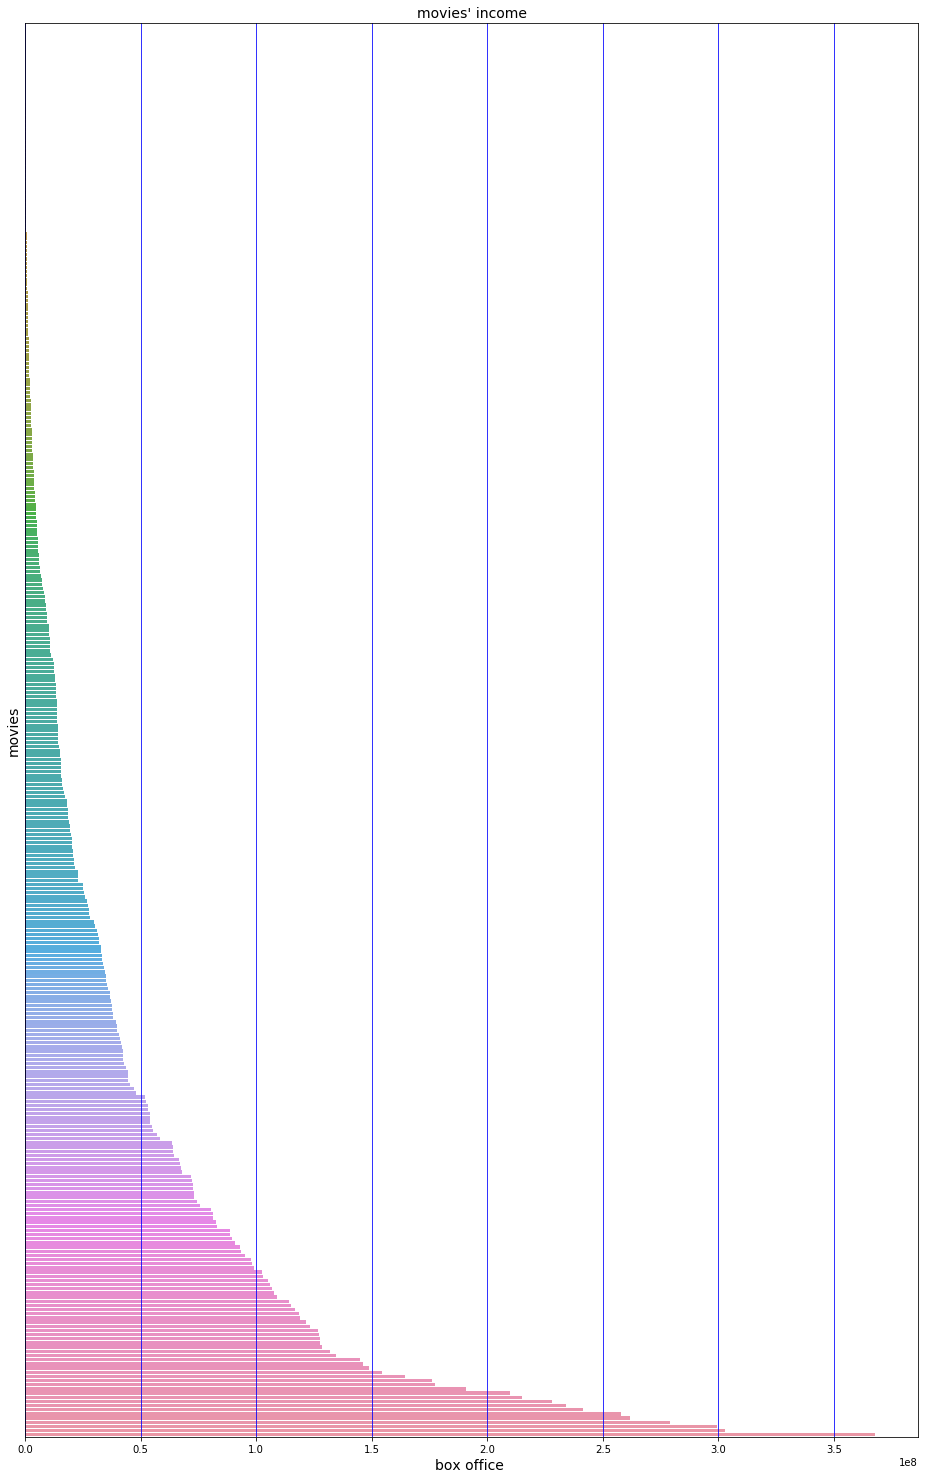

In [91]:
plt.figure(figsize =(16,26))
sns.barplot(x='box_office',y='synopsis',data=df_rt_movie)


plt.grid(zorder=0,color='b')
plt.yticks([])
plt.title("movies' income", fontsize=14)
plt.xlabel("box office ", fontsize=14)
plt.ylabel("movies", fontsize=14)

plt.show()

In [92]:
# checking for duplicates
df_rt_movie.duplicated().any()

False

#### At this point we have 340 movies with credible box-office info. 
#### Let's join with the dataframe containing the reviews using the id columns

In [97]:
# Let's check 'id' is a unique identifier for movies in both dataframes
# checking id =1525 = James Bond Skyfall movie
print(df_rt_movie.loc[df_rt_movie['id'] == 1525])
df_rt_rev.loc[df_rt_rev['id'] == 1525]


     level_0  index    id                                           synopsis  \
337      254   1188  1525  In Skyfall, Bond's loyalty to M is tested as h...   

    rating                                      genre    director  \
337  PG-13  Action and Adventure|Mystery and Suspense  Sam Mendes   

                                 writer theater_date      dvd_date currency  \
337  John Logan|Robert Wade|Neal Purvis  Nov 9, 2012  Mar 11, 2013        $   

     box_office      runtime studio  
337   299300000  145 minutes    MGM  


id                                             review rating   fresh  \
39981  1525  There's just a gripping story and a tremendous...   9/10   fresh   
39982  1525  The film makes Bond feel relevant and new with...      1   fresh   
39983  1525  It doesn't celebrate the glamorous lifestyle o...    NaN   fresh   
39984  1525  Bond can be forever reinvented, reinterpreted,...    NaN   fresh   
39985  1525  The theme of Skyfall is that the world must re...    NaN  rotten   
...     ...                                                ...    ...     ...   
40238  1525  Feels more seriously connected to real-world c...    NaN   fresh   
40239  1525  Thrilling opening sequence with implausible fe...    4/5   fresh   
40240  1525             Works terrifically well up to a point.    3/5   fresh   
40241  1525  Skyfall shakes together familiar elements of t...    4/5   fresh   
40242  1525  Undoubtedly Daniel Craig's best outing; this i...    4/5   fresh   

                critic  top_critic             publisher              date  
39981   Debbie Baldwin           0            Ladue News  November 6, 2018  
39982  Jennifer Heaton           0      Alternative Lens  November 1, 2018  
39983        Pat Padua           0                 DCist   August 30, 2018  
39984      John Powers           0       NPR's Fresh Air      May 17, 2018  
39985              NaN           0                   n+1    April 30, 2018  
...                ...         ...                   ...               ...  
40238    Todd McCarthy           1    Hollywood Reporter  October 13, 2012  
40239  Caroline Jowett           0    Daily Express (UK)  October 13, 2012  
40240       Xan Brooks           0              Guardian  October 13, 2012  
40241    Robbie Collin           0  Daily Telegraph (UK)  October 13, 2012  
40242         Jon Lyus           0              HeyUGuys  October 12, 2012  

[262 rows x 8 columns]

In [98]:
df_rt_rev.set_index('id',inplace=True)

In [99]:
df_rt_rev.head()

review rating   fresh  \
id                                                                     
3   A distinctly gallows take on contemporary fina...    3/5   fresh   
3   It's an allegory in search of a meaning that n...    NaN  rotten   
3   ... life lived in a bubble in financial dealin...    NaN   fresh   
3   Continuing along a line introduced in last yea...    NaN   fresh   
3              ... a perverse twist on neorealism...     NaN   fresh   

            critic  top_critic         publisher               date  
id                                                                   
3       PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
3   Annalee Newitz           0           io9.com       May 23, 2018  
3     Sean Axmaker           0  Stream on Demand    January 4, 2018  
3    Daniel Kasman           0              MUBI  November 16, 2017  
3              NaN           0      Cinema Scope   October 12, 2017

In [100]:
df_rt_movie.set_index('id',inplace=True)
df_rt_movie.head()

level_0  index                                           synopsis  \
id                                                                        
1260      205    970  With the recent assault on Berlusconi in Milan...   
469        76    359  Jacqueline Kennedy Onassis sued him, Marlon Br...   
895       145    697  After a sexual assault by a random stranger, S...   
884       143    691  Freebie (James Caan) and the Bean (Alan Arkin)...   
1639      278   1269  In this darkly erotic drama from cult filmmake...   

     rating                                              genre  \
id                                                               
1260     NR            Documentary|Special Interest|Television   
469   PG-13  Documentary|Musical and Performing Arts|Specia...   
895      NR                  Drama|Horror|Mystery and Suspense   
884       R                  Action and Adventure|Comedy|Drama   
1639     NR                  Art House and International|Drama   

            director                           writer  theater_date  \
id                                                                    
1260    Erik Gandini                     Erik Gandini  Aug 28, 2009   
469        Leon Gast                              NaN  Jul 30, 2010   
895     Eric England                     Eric England  Nov 22, 2013   
884     Richard Rush                   Robert Kaufman  Dec 25, 1974   
1639  Jeanne Labrune  Jeanne Labrune|Richard Debuisne  Aug 26, 2011   

          dvd_date currency  box_office      runtime                 studio  
id                                                                           
1260   Sep 7, 2010        $         363   84 minutes           Lorber Films  
469   Oct 19, 2010        $        2367   88 minutes      Magnolia Pictures  
895   Mar 18, 2014        $        3328   84 minutes              IFC Films  
884   Jan 11, 2011        $        8300  114 minutes  Warner Bros. Pictures  
1639  Jan 17, 2012        $        8856   95 minutes     First Run Features

In [101]:
# inner join of df_rt_movie and df_rt_rev
dfa=df_rt_movie.join(df_rt_rev,how='inner',rsuffix='review')

In [102]:
dfa

level_0  index                                           synopsis  \
id                                                                        
3           0      1  New York City, not-too-distant-future: Eric Pa...   
3           0      1  New York City, not-too-distant-future: Eric Pa...   
3           0      1  New York City, not-too-distant-future: Eric Pa...   
3           0      1  New York City, not-too-distant-future: Eric Pa...   
3           0      1  New York City, not-too-distant-future: Eric Pa...   
...       ...    ...                                                ...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   

     rating                                             genre  \
id                                                              
3         R                 Drama|Science Fiction and Fantasy   
3         R                 Drama|Science Fiction and Fantasy   
3         R                 Drama|Science Fiction and Fantasy   
3         R                 Drama|Science Fiction and Fantasy   
3         R                 Drama|Science Fiction and Fantasy   
...     ...                                               ...   
1996      R  Action and Adventure|Horror|Mystery and Suspense   
1996      R  Action and Adventure|Horror|Mystery and Suspense   
1996      R  Action and Adventure|Horror|Mystery and Suspense   
1996      R  Action and Adventure|Horror|Mystery and Suspense   
1996      R  Action and Adventure|Horror|Mystery and Suspense   

              director                        writer  theater_date  \
id                                                                   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
...                ...                           ...           ...   
1996               NaN                           NaN  Aug 18, 2006   
1996               NaN                           NaN  Aug 18, 2006   
1996               NaN                           NaN  Aug 18, 2006   
1996               NaN                           NaN  Aug 18, 2006   
1996               NaN                           NaN  Aug 18, 2006   

         dvd_date currency  box_office      runtime             studio  \
id                                                                       
3     Jan 1, 2013        $      600000  108 minutes  Entertainment One   
3     Jan 1, 2013        $      600000  108 minutes  Entertainment One   
3     Jan 1, 2013        $      600000  108 minutes  Entertainment One   
3     Jan 1, 2013        $      600000  108 minutes  Entertainment One   
3     Jan 1, 2013        $      600000  108 minutes  Entertainment One   
...           ...      ...         ...          ...                ...   
1996  Jan 2, 2007        $    33886034  106 minutes    New Line Cinema   
1996  Jan 2, 2007        $    33886034  106 minutes    New Line Cinema   
1996  Jan 2, 2007        $    33886034  106 minutes    New Line Cinema   
1996  Jan 2, 2007        $    33886034  106 minutes    New Line Cinema   
1996  Jan 2, 2007        $    33886034  106 minutes    New Line Cinema   

                                                 review ratingreview   fresh  \
id                                                                             
3     A distinctly gallows take on contemporary fina...          3/5   fresh   
3     It's an allegory in search of a meaning that n...          NaN  

### Feature engineering
#### categorical variable low/medium/high based on box_office $ amounts

In [24]:
dfa['box_office'].describe()

count    3.331000e+04
mean     5.315433e+07
std      6.906961e+07
min      3.630000e+02
25%      6.100613e+06
50%      2.680000e+07
75%      7.422362e+07
max      3.680000e+08
Name: box_office, dtype: float64

In [108]:
income_lmh = []
for amount in dfa['box_office']:
    if amount < 6000000:
        income_lmh.append('low')
#         'low'  =  first 25 % of the data. first quartile
    elif  amount <74000000:
        income_lmh.append('medium')
    else:
        income_lmh.append('high')
#         'high'  =  last 25 % of the data. top quartile

print(len(income_lmh))
dfa['income_lmh'] = income_lmh
dfa

33310


level_0  index                                           synopsis  \
id                                                                        
3           0      1  New York City, not-too-distant-future: Eric Pa...   
3           0      1  New York City, not-too-distant-future: Eric Pa...   
3           0      1  New York City, not-too-distant-future: Eric Pa...   
3           0      1  New York City, not-too-distant-future: Eric Pa...   
3           0      1  New York City, not-too-distant-future: Eric Pa...   
...       ...    ...                                                ...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   
1996      339   1555  Forget terrorists or hijackers -- there's a ha...   

     rating                                             genre  \
id                                                              
3         R                 Drama|Science Fiction and Fantasy   
3         R                 Drama|Science Fiction and Fantasy   
3         R                 Drama|Science Fiction and Fantasy   
3         R                 Drama|Science Fiction and Fantasy   
3         R                 Drama|Science Fiction and Fantasy   
...     ...                                               ...   
1996      R  Action and Adventure|Horror|Mystery and Suspense   
1996      R  Action and Adventure|Horror|Mystery and Suspense   
1996      R  Action and Adventure|Horror|Mystery and Suspense   
1996      R  Action and Adventure|Horror|Mystery and Suspense   
1996      R  Action and Adventure|Horror|Mystery and Suspense   

              director                        writer  theater_date  \
id                                                                   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
3     David Cronenberg  David Cronenberg|Don DeLillo  Aug 17, 2012   
...                ...                           ...           ...   
1996               NaN                           NaN  Aug 18, 2006   
1996               NaN                           NaN  Aug 18, 2006   
1996               NaN                           NaN  Aug 18, 2006   
1996               NaN                           NaN  Aug 18, 2006   
1996               NaN                           NaN  Aug 18, 2006   

         dvd_date currency  ...      runtime             studio  \
id                          ...                                   
3     Jan 1, 2013        $  ...  108 minutes  Entertainment One   
3     Jan 1, 2013        $  ...  108 minutes  Entertainment One   
3     Jan 1, 2013        $  ...  108 minutes  Entertainment One   
3     Jan 1, 2013        $  ...  108 minutes  Entertainment One   
3     Jan 1, 2013        $  ...  108 minutes  Entertainment One   
...           ...      ...  ...          ...                ...   
1996  Jan 2, 2007        $  ...  106 minutes    New Line Cinema   
1996  Jan 2, 2007        $  ...  106 minutes    New Line Cinema   
1996  Jan 2, 2007        $  ...  106 minutes    New Line Cinema   
1996  Jan 2, 2007        $  ...  106 minutes    New Line Cinema   
1996  Jan 2, 2007        $  ...  106 minutes    New Line Cinema   

                                                 review ratingreview   fresh  \
id                                                                             
3     A distinctly gallows take on contemporary fina...          3/5   fresh   
3     It's an allegory in search of a meaning that n...          NaN  rotten   
3     ... life lived in a bubble in financial dealin...          NaN   fresh   
3

In [110]:
# number of reviews for successful movies.
len(dfa.loc[dfa['income_lmh'] == 'high'])


8343

In [112]:
# number of reviews for unsuccessful movies.
len(dfa.loc[dfa['income_lmh'] == 'low'])

8104

#### We have a similar number of reviews for low and high income_lmh values. It is a good thing

### Now I would like to find most used keywords in reviews for high income_lmh and compare with most used keywords in reviews for low income_lmh

In [113]:
dfb= dfa.loc[dfa ['income_lmh']  == 'high']


In [114]:
goodreviews = ''
for elem in list(dfb.review):
    goodreviews = goodreviews + str(elem)
goodreviews


'The movie is great. It is interesting without being heavy, smart without being pretentious and entertaining without being solicitous.It doesn\'t matter how much of the story is true because the film is the real deal.David O. Russell follows The Fighter and Silver Linings Playbook with the third entry in his "reinvention" trilogy, a film which is getting as much gold and silver on the mantelpiece this award season as his previous two, but less deservedly so.The movie and most of its characters too often feel like caricatures, their energy pilfered from superior movies you\'ve seen before.As cons within cons press loyalties on every side, the film is less about political corruption than the deep longing of its characters to find a piece of solid ground, something they can stake a life on.It busies itself with a rollicking soundtrack, sexy costumes, and increasingly implausible romantic encounters between the film\'s principals.American Hustle amuses with irony, music and wit. It tantali

### Let's clean up our text 

In [115]:
def cleaner(text, punctuation = """.?!*$%^&()@#<>\'/,"[]-;:"""):
#     text= text.strip().strip("\n").strip("\t")
    text=text.replace("\n"," ")
    text=text.replace("\r"," ")
    for punc in punctuation:
        text=text.replace(punc," ")
    text=text.lower()
    return text

In [116]:
goodreviews_cleaned = cleaner(goodreviews)

In [30]:
goodreviews_cleaned

'the movie is great  it is interesting without being heavy  smart without being pretentious and entertaining without being solicitous it doesn t matter how much of the story is true because the film is the real deal david o  russell follows the fighter and silver linings playbook with the third entry in his  reinvention  trilogy  a film which is getting as much gold and silver on the mantelpiece this award season as his previous two  but less deservedly so the movie and most of its characters too often feel like caricatures  their energy pilfered from superior movies you ve seen before as cons within cons press loyalties on every side  the film is less about political corruption than the deep longing of its characters to find a piece of solid ground  something they can stake a life on it busies itself with a rollicking soundtrack  sexy costumes  and increasingly implausible romantic encounters between the film s principals american hustle amuses with irony  music and wit  it tantalizes

In [121]:
# split the text into words
goodwords = goodreviews_cleaned.split()

# create a dictionary
goodwords_counts={}

#iterate through the text
for word in goodwords:
    # update dictionary goodwords_counts
    # get(word,0) = 0 if word not found /or/ the correspnding value of word if found in the dictionary 
    goodwords_counts[word] = goodwords_counts.get(word,0) + 1
    
# turn dictionary in list of tuples for words with 3+ letters
goodwords_tuples=[]
for k,v in goodwords_counts.items():
    if len(k)>=3:
        goodwords_tuples.append((k,v))

# sort words form most used to less used (descending order)
sorted_goodwords_tuples = sorted(goodwords_tuples, key = lambda x:x[1], reverse=True)
top_good_dict = dict(sorted_goodwords_tuples[:500])

In [122]:
top_good_dict

{'the': 9083,
 'and': 5278,
 'that': 2203,
 'with': 1496,
 'but': 1454,
 'this': 1425,
 'for': 1411,
 'movie': 1321,
 'film': 1230,
 'you': 1104,
 'its': 960,
 'not': 765,
 'one': 656,
 'more': 650,
 'all': 603,
 'than': 599,
 'have': 591,
 'from': 580,
 'has': 575,
 'are': 575,
 'like': 554,
 'comedy': 524,
 'about': 487,
 'there': 454,
 'his': 446,
 'just': 435,
 'out': 435,
 'what': 423,
 'will': 416,
 'most': 414,
 'can': 411,
 'good': 393,
 'much': 378,
 'who': 364,
 'action': 358,
 'into': 352,
 'best': 344,
 'funny': 340,
 'even': 339,
 'story': 338,
 'some': 335,
 'too': 319,
 'time': 309,
 'fun': 305,
 'they': 303,
 'when': 296,
 'their': 268,
 'enough': 257,
 'been': 256,
 'well': 253,
 'only': 252,
 'never': 252,
 'make': 252,
 'your': 245,
 'while': 232,
 'was': 231,
 'which': 230,
 'doesn': 224,
 'two': 223,
 'characters': 220,
 'way': 215,
 'great': 213,
 'really': 213,
 'very': 211,
 'may': 210,
 'movies': 209,
 'romantic': 208,
 'better': 208,
 'made': 207,
 'first': 20

#### At this point, need to extract meaningful words out of thid dictionary. I don't know how to do this automatically. So I just did it "manually" by cgoing through the list and choosing the 11 most used  meaningful words 

In [124]:
top_good_dict_select={'comedy': 524,'action': 358,'funny': 340,'story': 338,'fun': 305,'characters': 372,'romantic': 208,
                     'director': 185,'thriller': 174,'cast': 164,'entertaining': 158}
                     

In [125]:
top_good_dict_select

{'comedy': 524,
 'action': 358,
 'funny': 340,
 'story': 338,
 'fun': 305,
 'characters': 372,
 'romantic': 208,
 'director': 185,
 'thriller': 174,
 'cast': 164,
 'entertaining': 158}

### Repeating the same process for the unsuccessful movies.

In [126]:
dflow= dfa.loc[dfa ['income_lmh']  == 'low']

In [127]:
badreviews = ''
for elem in list(dflow.review):
    badreviews = badreviews + str(elem)
badreviews

'A distinctly gallows take on contemporary financial mores, as one absurdly rich man\'s limo ride across town for a haircut functions as a state-of-the-nation discourse. It\'s an allegory in search of a meaning that never arrives...It\'s just old-fashioned bad storytelling.... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.Continuing along a line introduced in last year\'s "A Dangerous Method", David Cronenberg pushes his cinema towards a talky abstraction in his uncanny, perversely funny and frighteningly insular adaptation of Don DeLillo, "Cosmopolis".... a perverse twist on neorealism... ... Cronenberg\'s Cosmopolis expresses something new and necessary about the book, which is to say about limits, the gaps in what can be known, both within and between us.Quickly grows repetitive and tiresome, meandering 

In [128]:
badreviews_cleaned = cleaner(badreviews)

In [130]:
badreviews_cleaned

'a distinctly gallows take on contemporary financial mores  as one absurdly rich man s limo ride across town for a haircut functions as a state of the nation discourse  it s an allegory in search of a meaning that never arrives   it s just old fashioned bad storytelling     life lived in a bubble in financial dealings and digital communications and brief face to face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous new york city continuing along a line introduced in last year s  a dangerous method   david cronenberg pushes his cinema towards a talky abstraction in his uncanny  perversely funny and frighteningly insular adaptation of don delillo   cosmopolis      a perverse twist on neorealism        cronenberg s cosmopolis expresses something new and necessary about the book  which is to say about limits  the gaps in what can be known  both within and between us quickly grows repetitive and tiresome  meandering towar

In [131]:
# split the text into words
badwords = badreviews_cleaned.split()

# create a dictionary
badwords_counts={}

#iterate through the text
for word in badwords:
    # update dictionary badwords_counts
    # get(word,0) = 0 if word not found /or/ the corresponding value of word if found in the dictionary 
    badwords_counts[word] = badwords_counts.get(word,0) + 1
    
# turn dictionary in list of tuples for words with 3+ letters
badwords_tuples=[]
for k,v in badwords_counts.items():
    if len(k)>=3:
        badwords_tuples.append((k,v))

# sort words from most used to less used (descending order)
sorted_badwords_tuples = sorted(badwords_tuples, key = lambda x:x[1], reverse=True)
top_bad_dict = dict(sorted_badwords_tuples[:500])

In [132]:
top_bad_dict

{'the': 8153,
 'and': 5307,
 'that': 2076,
 'but': 1502,
 'with': 1398,
 'film': 1344,
 'for': 1280,
 'this': 1228,
 'its': 1017,
 'movie': 889,
 'you': 748,
 'not': 727,
 'are': 635,
 'about': 595,
 'his': 584,
 'one': 579,
 'like': 558,
 'all': 555,
 'from': 546,
 'story': 545,
 'more': 518,
 'than': 496,
 'has': 482,
 'there': 449,
 'have': 438,
 'can': 387,
 'into': 357,
 'what': 351,
 'who': 347,
 'out': 336,
 'too': 327,
 'much': 316,
 'just': 312,
 'even': 312,
 'director': 288,
 'most': 284,
 'comedy': 284,
 'good': 282,
 'characters': 278,
 'some': 267,
 'time': 266,
 'never': 261,
 'way': 256,
 'life': 254,
 'will': 253,
 'well': 252,
 'which': 243,
 'drama': 235,
 'make': 232,
 'little': 231,
 'their': 228,
 'when': 224,
 'performances': 223,
 'they': 223,
 'her': 218,
 'makes': 216,
 'performance': 216,
 'while': 207,
 'best': 205,
 'love': 204,
 'may': 194,
 'very': 193,
 'only': 190,
 'work': 187,
 'enough': 186,
 'how': 185,
 'doesn': 184,
 'funny': 177,
 'been': 174,
 '

In [139]:
# manual selection of the most found keywords:
top_bad_dict_select={'director': 288,'comedy': 284,'characters': 446,'drama': 235,'performances': 439,'love': 204, 'funny': 177,
                    'tale': 174,'documentary': 115,'emotional': 108,'interesting': 104}

In [140]:
top_bad_dict_select

{'director': 288,
 'comedy': 284,
 'characters': 446,
 'drama': 235,
 'performances': 439,
 'love': 204,
 'funny': 177,
 'tale': 174,
 'documentary': 115,
 'emotional': 108,
 'interesting': 104}

In [144]:
top_bad_dict_select.items()

dict_items([('director', 288), ('comedy', 284), ('characters', 446), ('drama', 235), ('performances', 439), ('love', 204), ('funny', 177), ('tale', 174), ('documentary', 115), ('emotional', 108), ('interesting', 104)])

In [199]:
df_bad=pd.DataFrame(data= top_bad_dict_select.items(),columns=['keyword','number_occurences'])
df_good=pd.DataFrame(data= top_good_dict_select.items(),columns=['keyword','number_occurences'])
df_bad['flag']='unsuccessful'
df_good['flag']='successful'

In [201]:
df_keywords=pd.concat([df_good,df_bad])

In [202]:
df_keywords.reset_index(inplace=True)

In [203]:
df_keywords

index       keyword  number_occurences          flag
0       0        comedy                524    successful
1       1        action                358    successful
2       2         funny                340    successful
3       3         story                338    successful
4       4           fun                305    successful
5       5    characters                372    successful
6       6      romantic                208    successful
7       7      director                185    successful
8       8      thriller                174    successful
9       9          cast                164    successful
10     10  entertaining                158    successful
11      0      director                288  unsuccessful
12      1        comedy                284  unsuccessful
13      2    characters                446  unsuccessful
14      3         drama                235  unsuccessful
15      4  performances                439  unsuccessful
16      5          love                204  unsuccessful
17      6         funny                177  unsuccessful
18      7          tale                174  unsuccessful
19      8   documentary                115  unsuccessful
20      9     emotional                108  unsuccessful
21     10   interesting                104  unsuccessful

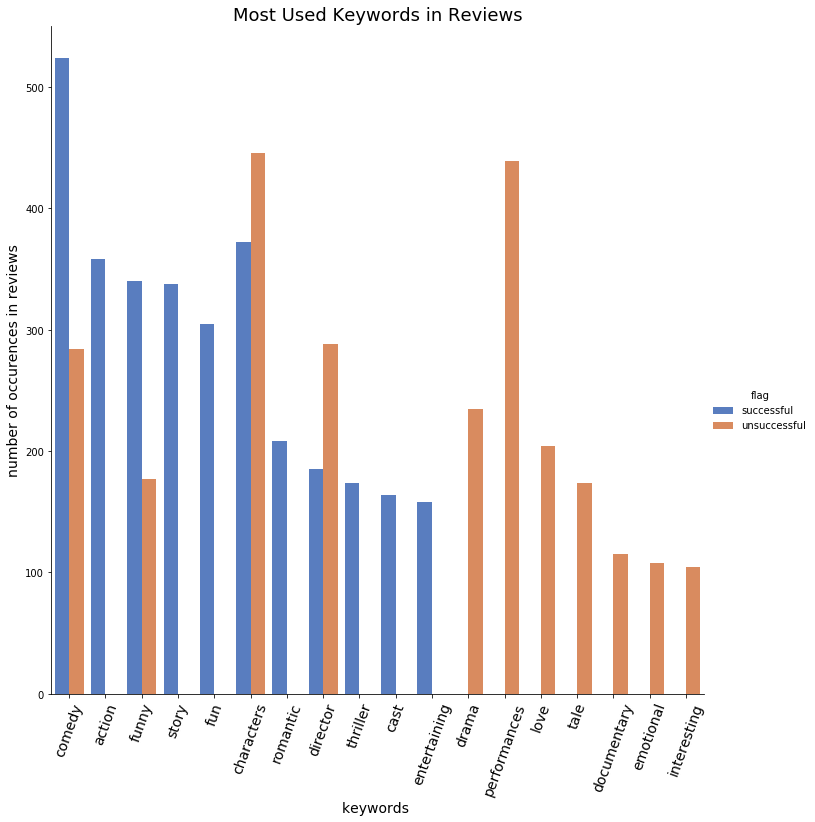

In [226]:
# plt.figure(figsize =(16,10))

g = sns.catplot(x="keyword", y="number_occurences", hue="flag", data=df_keywords,
                height=10, 
                kind="bar", palette="muted")

plt.title("Most Used Keywords in Reviews", fontsize=18)
plt.xlabel("keywords ", fontsize=14)
plt.ylabel("number of occurences in reviews", fontsize=14)
plt.xticks(rotation=70,fontsize=14)

# plt.grid(zorder=0,color='b')
# plt.yticks([])
# plt.title("movies' income", fontsize=14)
# plt.xlabel("box office ", fontsize=14)
# plt.ylabel("movies", fontsize=14)

plt.show()

### Interpretation
#### The words "action", "story", "fun", "cast" and "entertaining" appear often  in the reviews of profitable movies, but rarely in reviews of unsuccessful movies. They are likely to be characteristics contributing to success at the box office
#### The words "comedy" and "funny" appear more in successful movies' reviews. So, they are also likely to be contributors to success.
#### The words "characters" and "director" appear in both types of reviews but a bit more in unsuccessful movies. They must be key in making a movie successful or not. It seems they can almost equally "make or break" a movie.
#### The words "drama", "persormances", "love", "tale", "documentary", "emotional" and "interesting" are more difficult to interpret as they are very frequent only  in unsuccessful movies' reviews, but they are not inherently negative.

### conclusion:
####  To make a successful movie, invest time and effort into  the story and the cast. Make sure there is action and the movie is fun and entertaining. Include some funny comedy bits. Make sure you have quality characters and choose the director wisely.

